## Decision Tree (DT)

**Decision Tree used for linearly seperable data (draw a line to the scatterplot to separate data), however, Decision Tree use multiple lenear questions or learn from data with a set of if-then-else decision rules.**

Advantages:
1. Easy to use and allow graphically intepret the result 
2. Can build bigger classifier out of DT, it called "Ensemble Methods" (building a classifier out of classifier)

Disadvantages:
1. Not suitable to the data set with a lot of features, it could create a over-complicated DT and overfitting the data
2. Require tuning parameters so that the DT would not over-grown

**Entropy**
- *What is*: controls how a DT decides where to split the data, is the measure of impurity in a bunch of examples.
- *Use of Entropy in DT*: Try to find the variables and split point among the variables, that going to make subset as pure as possible. BY repeating this process recursively, helps the DT makes decision.
- Formula: Entropy i = SUM[-Pi * log2(Pi)] 


**Information Gain**
- *Formula*: = Entropy(parent)-[weighted average]entropy(children)
- Entropy of the parent *minus* the weighted average of entropy of the children, if you split that parent
- *Use of Information Gain in DT*: In case when a feature has many different values, DT algorithm will try to maximize the information gain and figure out where to make that split. The higher the Information Gain, the better. The DT algorithm should use the features with highest Information Gain to split the data.

Main Parameters:
- criterion - Specify "entropy" if would like to use the "information gain" to measure purity of the split. Default "gini" for the "Gini" purity
- min_samples_split (default 2) - Check the minimum number of samples available in order to split further. If the value=2, means that if the leaf size is <2, the split will stop. This parameter is important to avoid the overfitting (the decision boundary is too complicated) in the DT algorithm. The higher the value, the less complicated of the decision boundary. And the simpler decision boundary yield much better accuracy. 

In [1]:
import random

def makeTerrainData(n_points=1000):
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]
    
    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

In [6]:
def classifyDC(features_train, labels_train):   
    ### import the sklearn module for Decision Tree
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=0,min_samples_split=50)
    clf.fit(features_train, labels_train)
    return clf

In [3]:
import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

import base64
import json
import subprocess

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    %matplotlib inline
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    #plt.savefig("test.png")
    
def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print(image_start, json.dumps(data), image_end)

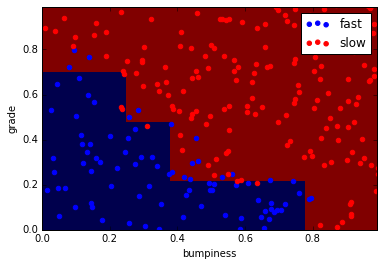

In [7]:
# MAIN

"""Use sklearn Decision Tree (DT) classifier to classify the terrain data.
   Objective of this exercise is to recreate the decision boundary found in the lesson video, and make a plot that
   visually shows the decision boundary """ 
features_train, labels_train, features_test, labels_test = makeTerrainData()

# the training data (features_train, labels_train) have both "fast" and "slow" points mixed
# in together--separate them so we can give them different colors in the scatterplot,
# and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

clf = classifyDC(features_train, labels_train)

# draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)

In [8]:
# Calculating Decision Tree accuracy
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)
print("{0}%".format(accuracy_score(labels_test, pred)*100))

91.2%


In [9]:
# Calculate Entropy
import math

-0.5*math.log(0.5,2) -0.5*math.log(0.5,2)

1.0